## Name : Kaveen Gandhi

## Task 1 : From IRIS DATASET Prediction using Decision Tree Algorithm 
## DataSet : Iris

### Import Libraries :

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

### Load Dataset :

In [38]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [40]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## EDA :

In [41]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [42]:
df.shape

(150, 5)

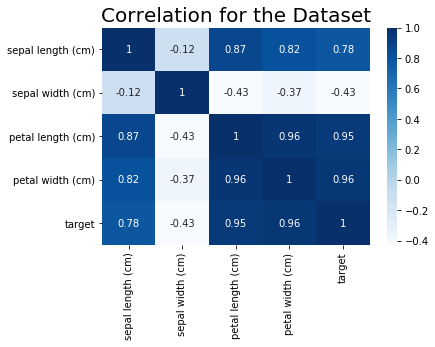

In [43]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.title("Correlation for the Dataset",fontsize=20)
plt.show()

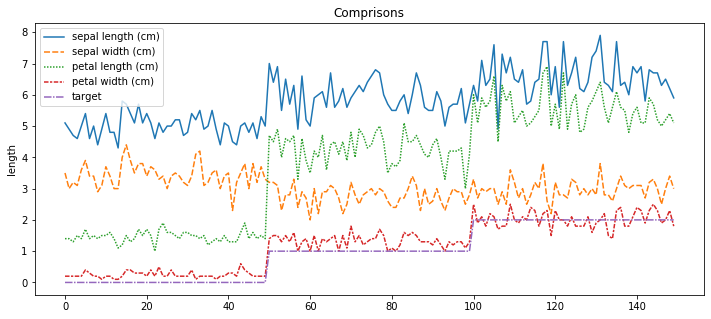

In [75]:
plt.figure(figsize=(12,5))
plt.title("Comprisons")
sns.lineplot(data=df)
plt.ylabel("length")
plt.show()

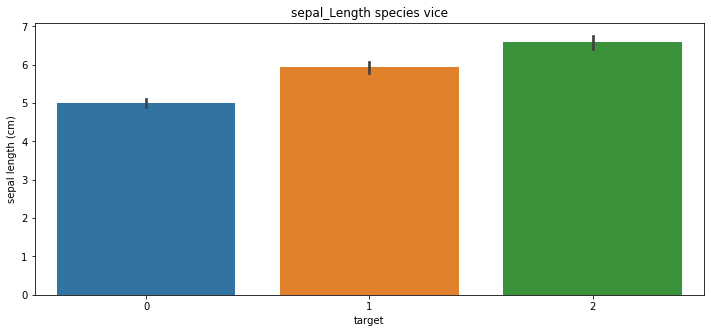

In [81]:
plt.figure(figsize=(12,5))
plt.title("sepal_Length species vice")
sns.barplot(x=df.target,y=df['sepal length (cm)'])

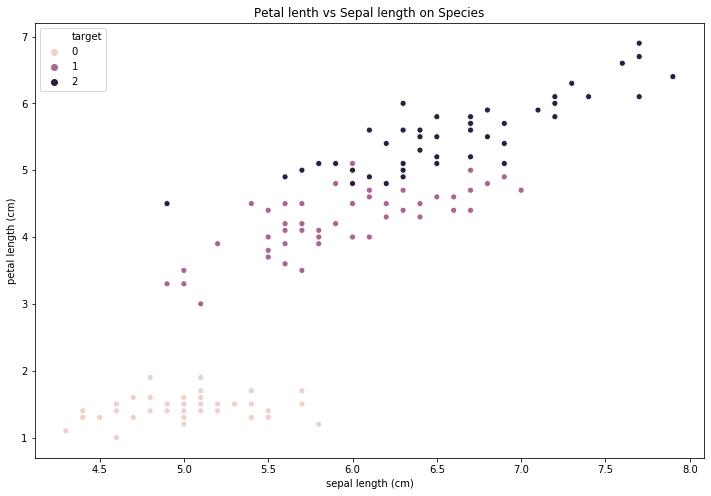

In [83]:
plt.figure(figsize=(12,8))
plt.title("Petal lenth vs Sepal length on Species")
sns.scatterplot(x=df['sepal length (cm)'],y=df['petal length (cm)'],hue=df.target)
plt.show()

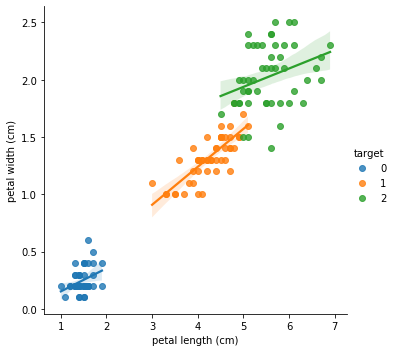

In [86]:
sns.lmplot(x='petal length (cm)',y='petal width (cm)',hue='target',data=df)
plt.show()

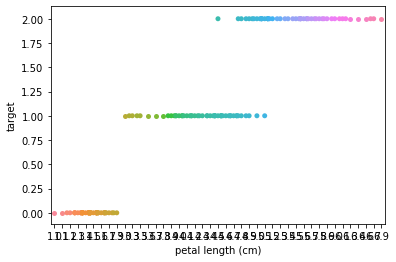

In [89]:
sns.swarmplot(x=df['petal length (cm)'],y=df.target)
plt.show()

Variance of PetalLength is very high it may be result in overfiting of model


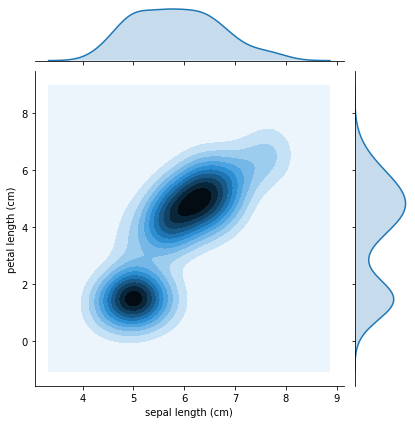

In [91]:
sns.jointplot(x=df['sepal length (cm)'],y=df['petal length (cm)'] , kind='kde')
print("Variance of PetalLength is very high it may be result in overfiting of model")
plt.show()

##  Creating Feature and Target variable :

In [46]:
X = df[data.feature_names]
y = df['target']

In [47]:
print("X shape :",X.shape)
print("Y shape :",y.shape)

X shape : (150, 4)
Y shape : (150,)


## Split the Data into Train and Test :

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=24)

In [49]:
print("X_train shape :\n",X_train.shape)
print("y_train shape :\n",y_train.shape)
print("X_test shape :\n",X_test.shape)
print("y_test shape :\n",y_test.shape)

X_train shape :
 (112, 4)
y_train shape :
 (112,)
X_test shape :
 (38, 4)
y_test shape :
 (38,)


### Feature Scaling for Model Performance:

In [50]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [51]:
np.set_printoptions(suppress=True) #convert exponential form to normal form

## Train the Model using Decision Tree :

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_pred=clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_t=clf.predict(X_train)

Confusion metrics : Decision Tree 
 [[12  0  0]
 [ 0  7  1]
 [ 0  0 18]]


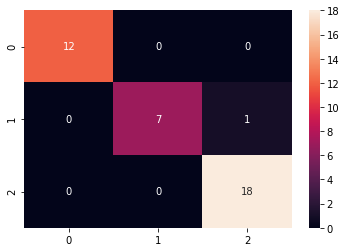

In [54]:
cn=confusion_matrix(y_test,y_pred)
print("Confusion metrics : Decision Tree \n",cn)
sns.heatmap(cn,annot=True,cbar=True)
plt.show()

In [55]:
train_score=accuracy_score(y_train, y_pred_t)*100
test_score=accuracy_score(y_test, y_pred)*100
print("Train Accuracy: ", train_score)
print("Test Accuracy: ", test_score)

Train Accuracy:  100.0
Test Accuracy:  97.36842105263158


In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [57]:
precision = precision_score(y_test,y_pred,average='macro')*100
print("Precision (how accurate the positive pridection are):: {}".format("%.3f" %precision))
recall = recall_score(y_test,y_pred,average='macro')*100
print("Recall (Converage of actual positive samples) :: {}".format("%.3f" %recall))
fscore = f1_score(y_test,y_pred,average='macro')*100
print("F1score (hybrid metric useful for unbalanced classes) :: {}".format("%.3f" %fscore))  

Precision (how accurate the positive pridection are):: 98.246
Recall (Converage of actual positive samples) :: 95.833
F1score (hybrid metric useful for unbalanced classes) :: 96.877


## Let us visualize the Decision Tree to understand it better 

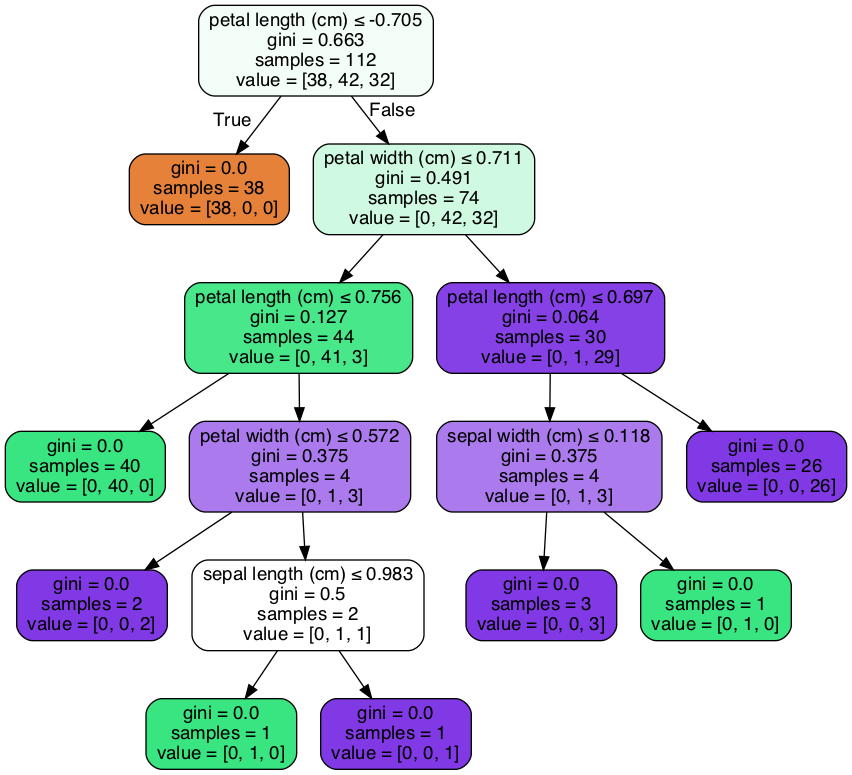

In [65]:
# Visualize the graph
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=data.feature_names,  
                filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Now feed any new/test data to this classifer and it would be able to predict the right class:

In [73]:
sepal_length=5.0
sepal_width=3.9
petal_length=1.9
petal_width=0.3

In [72]:
new_pred = clf.predict([[sepal_length,sepal_width,petal_length,petal_width]])
print("Predicted Species : {}".format(new_pred))
print('2 : iris - virginica')

Predicted Species : [2]
2 : iris - virginica
